<a href="https://colab.research.google.com/github/scottstossel/data-vis-practice/blob/main/networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nx_altair

In [ ]:
%matplotlib inline
import numpy as np
import networkx as nx
import altair as alt
import nx_altair as nxa

In [ ]:
G = nx.fast_gnp_random_graph(n=30, p=0.25)

pos = nx.spring_layout(G)

for n in G.nodes():
  G.nodes[n]['weight'] = np.random.randn()
  G.nodes[n]['name'] = np.random.randint(1000)
  G.nodes[n]['viable'] = np.random.choice(['yes','no'])

for e in G.edges():
  G.edges[(e[0],e[1])]['weight'] = np.random.uniform(1, 10)

EdgeView([(0, 8), (0, 22), (0, 25), (0, 27), (0, 29), (1, 4), (1, 7), (1, 8), (1, 9), (1, 10), (1, 15), (1, 19), (1, 21), (1, 23), (1, 24), (1, 29), (2, 10), (2, 11), (2, 19), (2, 23), (2, 24), (2, 25), (2, 26), (2, 29), (3, 5), (3, 11), (3, 17), (3, 18), (3, 20), (3, 23), (4, 7), (4, 9), (4, 12), (4, 16), (4, 24), (4, 26), (5, 10), (5, 16), (5, 20), (5, 21), (5, 25), (5, 27), (5, 28), (6, 10), (6, 14), (6, 16), (6, 18), (6, 20), (6, 24), (6, 26), (7, 9), (7, 16), (7, 17), (7, 23), (7, 25), (7, 27), (7, 28), (7, 29), (8, 11), (8, 18), (8, 21), (8, 22), (8, 28), (9, 17), (9, 19), (9, 22), (9, 29), (10, 14), (10, 16), (10, 21), (10, 26), (10, 27), (11, 16), (11, 22), (11, 24), (11, 26), (11, 29), (12, 14), (12, 17), (12, 20), (12, 22), (12, 29), (13, 15), (13, 18), (13, 22), (13, 23), (13, 24), (13, 29), (14, 28), (15, 17), (15, 21), (15, 23), (15, 29), (16, 18), (16, 27), (16, 29), (17, 20), (17, 25), (17, 28), (18, 23), (18, 26), (19, 23), (19, 24), (19, 26), (19, 29), (20, 21), (20, 2

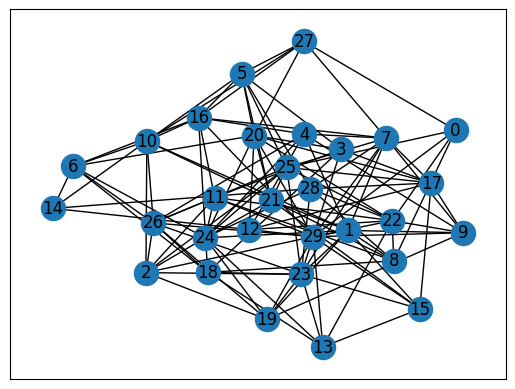

In [ ]:
nx.draw_networkx(
    G=G,
    pos=pos
)
G.edges

In [ ]:
nxa.draw_networkx(
    G=G,
    pos=pos,
    node_tooltip=['name', 'weight', 'viable']
).interactive()

alt.LayerChart(...)

In [ ]:
chart = nxa.draw_networkx(
    G=G,
    pos=pos,
    node_size = 200,
    node_color='viable',
    cmap='viridis',
    width='weight',
    node_tooltip=['name', 'weight', 'viable']
)

In [ ]:
edges = chart.layer[0]
nodes = chart.layer[1]

brush = alt.selection_interval(encodings=['x','y'])
color = alt.Color('viable:N', legend=None)

nodes = nodes.encode(
    fill=alt.condition(brush, color, alt.value('gray')),
).add_selection(
    brush
)

bars = alt.Chart(nodes.data).mark_bar().encode(
    x=alt.X('count()', scale=alt.Scale(domain=(0,20))),
    y='viable',
    color='viable'
).transform_filter(
    brush
)

alt.vconcat(edges+nodes, bars)

<ipython-input-8-82ae1191b6b7>:9: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use add_params instead.
  ).add_selection(


alt.VConcatChart(...)